In [3]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from math import ceil
import numpy as np
%matplotlib inline

In [4]:
def img_combine(img,ncols=8,size=1,path=False):
    '''
        combining pictures in one window
    '''
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig,axes = plt.subplots(nrows=nrows,ncols=ncols,sharex=True,sharey=True,figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 278s 2us/step


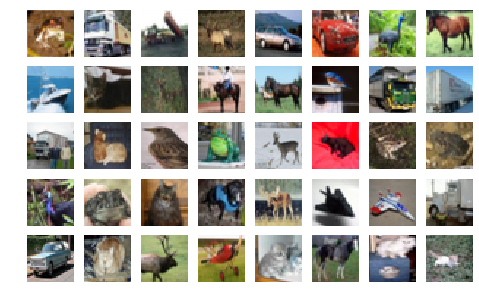

In [7]:
# 取前 32 張圖片做視覺化
images = x_train[:40]
img_combine(images)

In [8]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True)

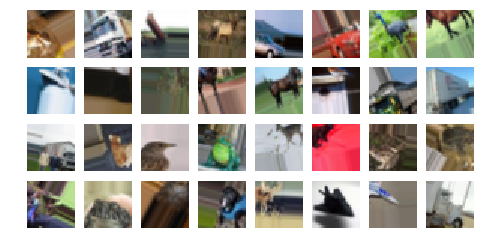

In [9]:
augmented_images = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_images.astype("int"))

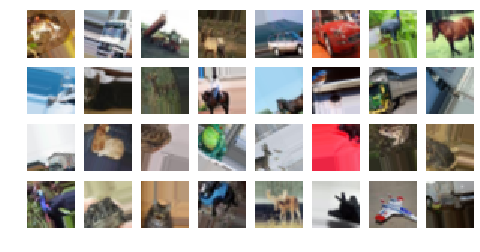

In [10]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))